### Step 1: Data Analysis and Preparation

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels import api as sm


In [41]:
df = pd.read_csv("Tips.csv")

df 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [42]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


### Step 2: Exploratory Data Analysis (EDA)

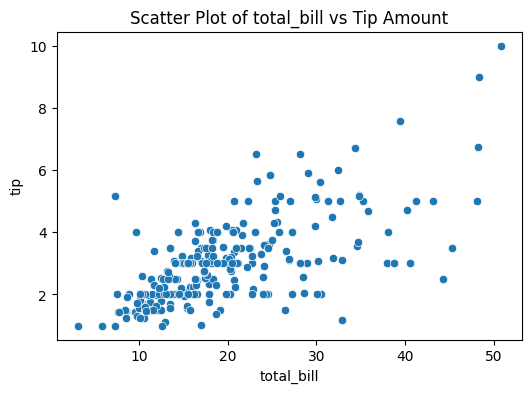

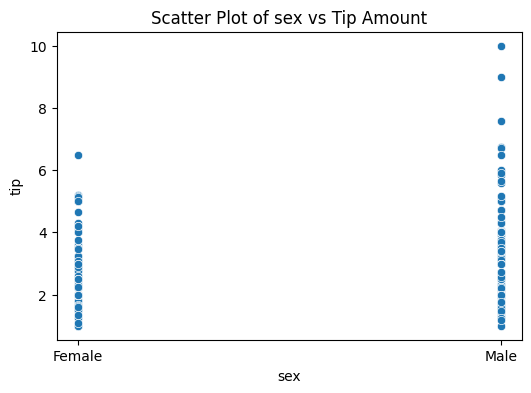

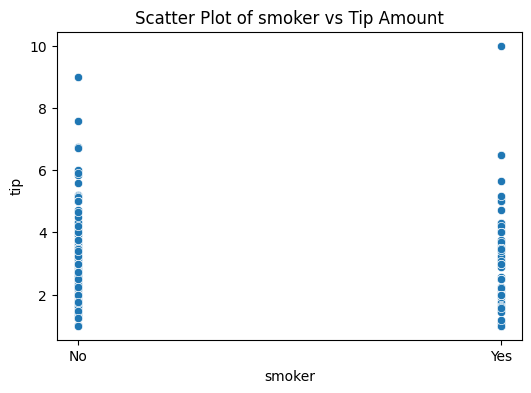

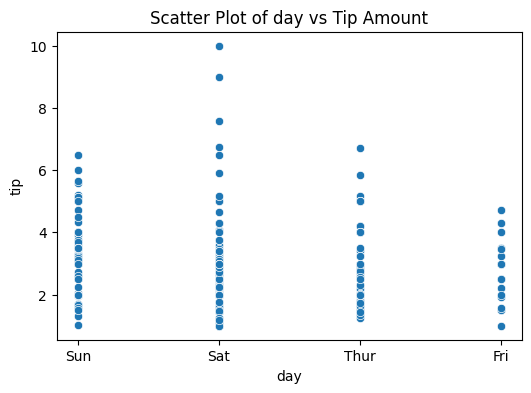

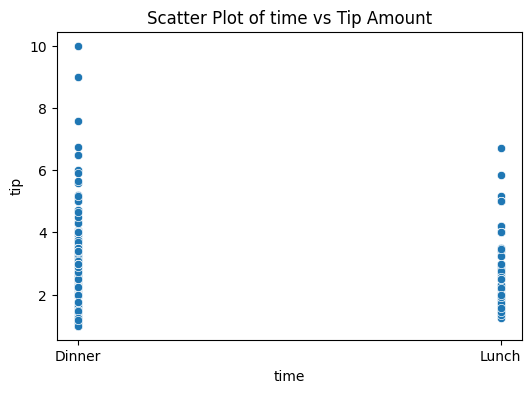

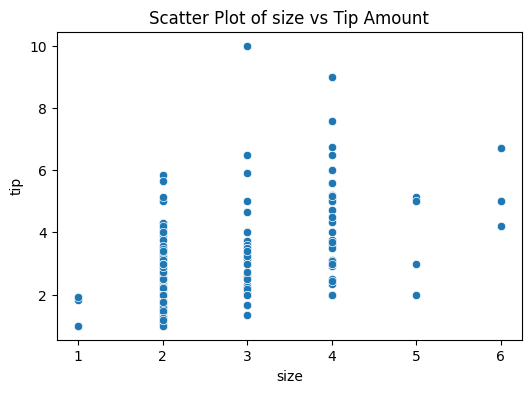

In [ ]:
# Scatter Plot
for column in df.columns:
    if column != 'tip':  
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=column, y='tip')
        plt.title(f'Scatter Plot of {column} vs Tip Amount')
        plt.show()

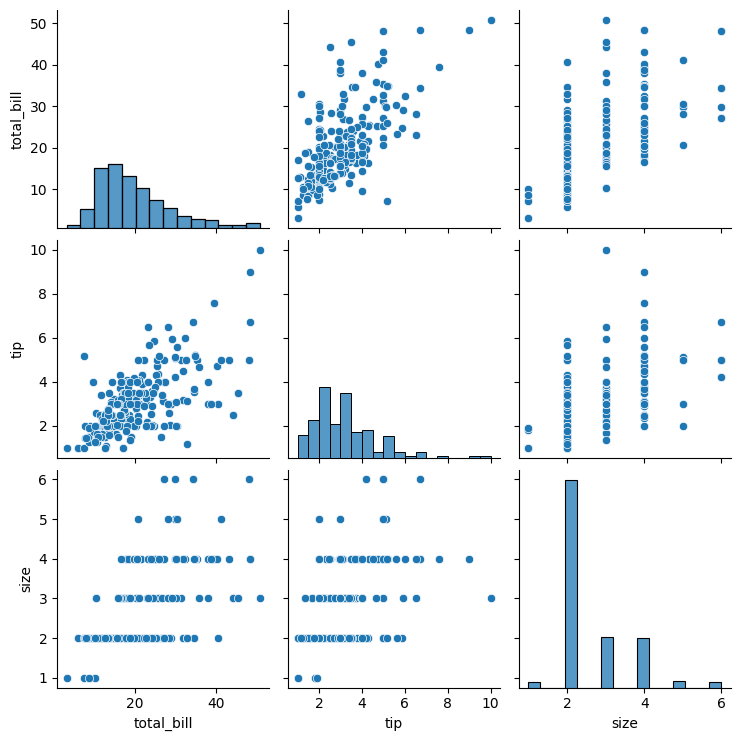

In [44]:
sns.pairplot(df)
plt.show()

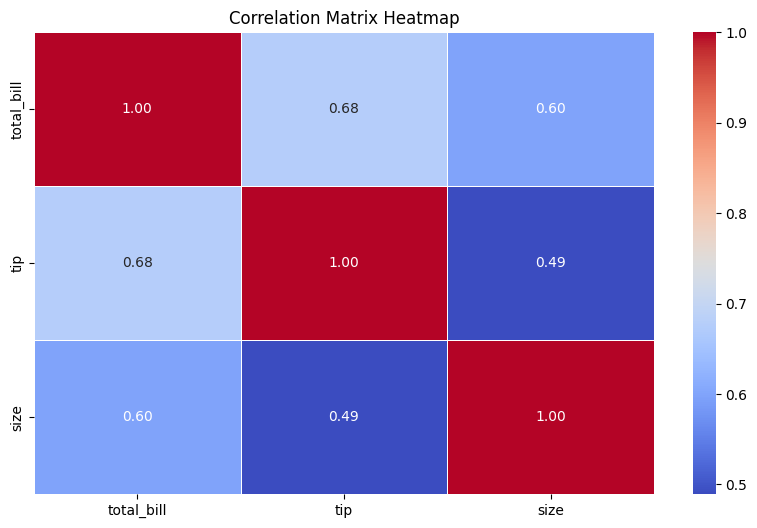

In [ ]:
# Heatmap:

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation analysis reveals a moderate positive relationship between tip and total bill amount (0.6), indicating that higher total bills tend to result in higher tips. Additionally, a moderate positive correlation is observed between tip and size (0.49), suggesting that larger groups generally leave higher tips. These findings highlight the influence of both bill size and group size on tipping behavior, providing valuable insights for optimizing service strategies.

In [ ]:
#Rainbow Test for Linearity
X = df[['total_bill', 'size']]
y = df['tip'] 


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

rainbow_test = linear_rainbow(model)
print(f"Rainbow Test statistic: {rainbow_test[0]} - p-value: {rainbow_test[1]}")

Rainbow Test statistic: 1.1902656646832817 - p-value: 0.17048935693447642


Since the p-value is greater than 0.05, we fail to reject the null hypothesis, implying that the linear regression model may be appropriate for the data. This is consistent with the assumption that the relationship between the independent variables and the target variable is linear.

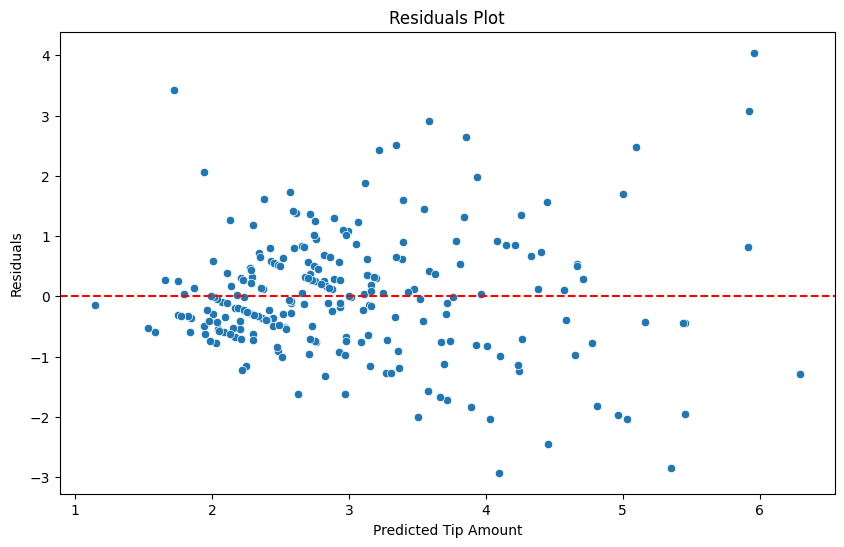

In [47]:
model_lr = LinearRegression()
model_lr.fit(df[['total_bill', 'size']], df['tip'])
y_pred = model_lr.predict(df[['total_bill', 'size']])
residuals = df['tip'] - y_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Residuals')
plt.show()

The residuals plot shows a generally random scatter of residuals around the red dashed line at 0, indicating that the linear regression model is performing reasonably well for most of the predicted tip amounts. However, in the lower region of the x-axis (predicted tip amounts between 2 and 3), there is a noticeable concentration of residuals around 0, suggesting that the model's predictions in this range are relatively accurate with smaller errors.

This concentration in the lower predicted tip amounts indicates that the model is able to predict tips in this range with higher precision, resulting in fewer and smaller residuals. In contrast, the larger tip amounts (greater than 3) may be where the model's predictions are less accurate, as we see more variability and larger residuals in this range. This suggests that the model might be underfitting for higher tip amounts, and there may be an opportunity to improve its predictions for these cases.

Overall, while the model performs well for lower tip amounts, it may require further refinement—such as adding more features, using polynomial regression, or trying non-linear models like decision trees or ensemble methods—to improve its prediction accuracy for higher tip amounts.

### Step 3: Model Building and Evaluation

In [ ]:
X = df[['total_bill', 'size']]
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Model Definitions

In [49]:
# 1. Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# 2. Ridge Regression (L2 regularization)
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

# 3. Lasso Regression (L1 regularization)
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

# 4. Decision Tree Regression
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# 5. Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# 6. Support Vector Regression (SVR)
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

# 7. K-Nearest Neighbors Regression (KNN)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


In [ ]:
#Evaluating the Models
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN']
predictions = [y_pred_lr, y_pred_ridge, y_pred_lasso, y_pred_dt, y_pred_rf, y_pred_svr, y_pred_knn]

for model, pred in zip(models, predictions):
    mae, mse, rmse, r2 = evaluate_model(y_test, pred)
    print(f"{model}:")
    print(f"  MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")
    print("-" * 50)


Linear Regression:
  MAE: 0.664, MSE: 0.649, RMSE: 0.805, R2: 0.481
--------------------------------------------------
Ridge Regression:
  MAE: 0.664, MSE: 0.648, RMSE: 0.805, R2: 0.482
--------------------------------------------------
Lasso Regression:
  MAE: 0.626, MSE: 0.567, RMSE: 0.753, R2: 0.547
--------------------------------------------------
Decision Tree:
  MAE: 0.818, MSE: 1.005, RMSE: 1.002, R2: 0.196
--------------------------------------------------
Random Forest:
  MAE: 0.737, MSE: 0.834, RMSE: 0.913, R2: 0.333
--------------------------------------------------
SVR:
  MAE: 0.561, MSE: 0.535, RMSE: 0.731, R2: 0.572
--------------------------------------------------
KNN:
  MAE: 0.721, MSE: 0.744, RMSE: 0.862, R2: 0.405
--------------------------------------------------


In [ ]:
#Hyperparameter Tuning for Random Forest 
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
#Hyperparameter Tuning for SVR 
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'rbf']
}
grid_search_svr = GridSearchCV(estimator=model_svr, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)
print(f"Best Parameters for SVR: {grid_search_svr.best_params_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVR: {'C': 100, 'epsilon': 0.2, 'kernel': 'rbf'}


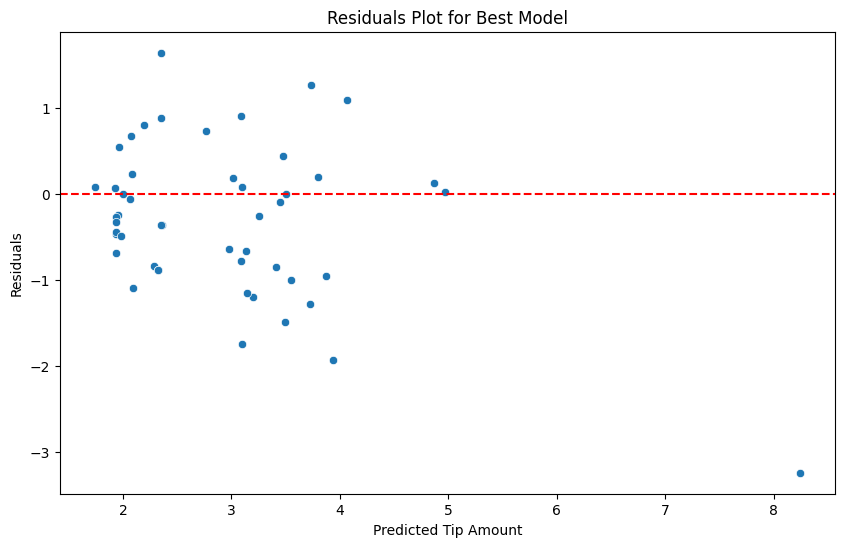

In [ ]:
#Plotting Residuals for the Best Model 
best_model = grid_search_rf.best_estimator_ 
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot for Best Model')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Residuals')
plt.show()

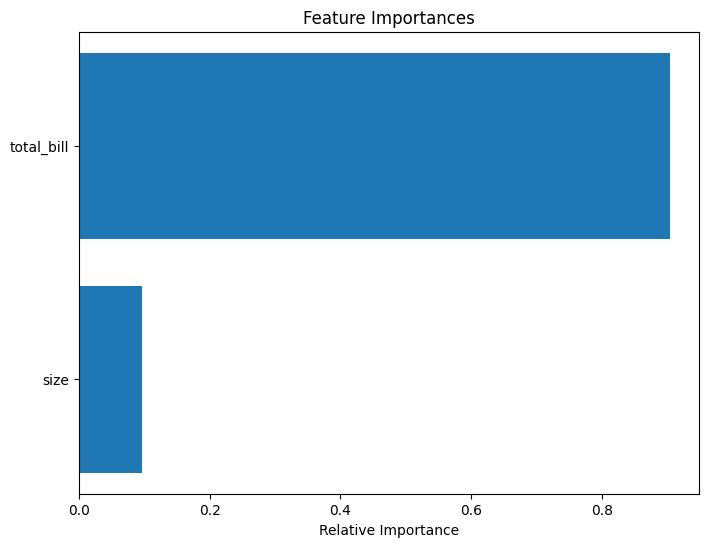

In [ ]:
importances = model_rf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Step 4: Conclusion and Recommendations:

#### Key Insights:
##### Bill Amount:
The correlation between bill_amount and tip is strong (0.6), indicating that higher bills lead to higher tips.
To increase tips, focusing on strategies that boost the total bill is crucial.
##### Party Size:
The size of the group has a moderate correlation (0.49) with tips, suggesting that larger parties tend to leave higher tips.
This can be leveraged to improve revenue through tailored group promotions.
##### Other Features:
Variables such as sex, smoker, day, and time show weaker correlations with tip amounts. However, these features may still provide valuable insights into customer behavior, particularly if more data is collected over time.
##### Model Performance:
Support Vector Regression (SVR) emerged as the best-performing model with an R² of 0.572, explaining over half of the variability in tip amounts. This suggests that SVR captures the most important trends in the data.
Lasso Regression and Linear Regression also performed well, indicating their effectiveness in modeling the relationship between the predictors and the target.
Decision Tree and Random Forest models showed lower performance (R² of 0.333 and 0.196, respectively), suggesting potential overfitting or underfitting of the data.
#### Recommendations for Restaurant Management:
##### Upsell to Increase Bill Amount:

Since bill_amount is the most significant predictor of tip amounts, increasing the total bill should be a key focus.
Implementing upselling strategies like offering premium items, drinks, and desserts could effectively increase the bill.
##### Cater to Larger Groups:

Party size is another critical factor influencing tips. Larger groups tend to leave bigger tips, so strategies to cater to larger groups should be prioritized.
Consider introducing group promotions, offering discounts for large parties, or providing dedicated seating for larger groups to enhance their dining experience.
##### Optimize Customer Experience:

While sex, smoker, day, and time showed weaker correlations, understanding their impact could still help optimize customer service:
Time of Day: Tips may vary between lunch and dinner hours. Analyzing this trend can help optimize staffing and service offerings based on peak hours.
Day of the Week: Weekend vs weekday tips could suggest different service strategies or promotions for each period.
Target Demographics: If trends emerge based on sex or smoker status, personalized service offerings could improve customer satisfaction.
#### Further Data Collection:

To improve predictions, additional customer data (e.g., loyalty programs, customer preferences, or frequency of visits) should be considered. Collecting such data can enhance model performance and provide deeper insights into customer behavior.
#### Model Improvement:

##### Hyperparameter Tuning: Further tuning of complex models like Random Forest and SVR can potentially improve their accuracy.
Feature Engineering: Introducing new features (e.g., customer age, historical tipping behavior) or exploring interactions between existing features may boost the model's predictive power.
#### Conclusion:
By focusing on the primary factors influencing tip amounts—bill amount and party size—the restaurant can develop strategies to enhance revenue. Upselling techniques, catering to larger parties, and optimizing customer service based on insights from data will drive both customer satisfaction and profitability. Additionally, refining the predictive models and collecting more detailed customer data will provide more accurate forecasts and actionable insights for continuous improvement.

